### Data Description

The dataset used in this project contains information about residential properties, with various features that are believed to influence house prices. The goal of this analysis is to predict the price of a house based on certain numerical and categorical attributes. The dataset includes several columns representing different aspects of the house, and the target variable is the house price.

In [2]:
#Importing pandas and numpy
import pandas as pd
import numpy as np
#Import data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('Housing.csv')
#Checking the dataset head
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.shape

(545, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data.describe

<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

## Data Cleaning

In [7]:
#checking missing value
data.isnull().sum()*100/data.shape[0]  #percentage of missing value is more useful especially for large dataset

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

No null values in the data set, so it is clean

In [8]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


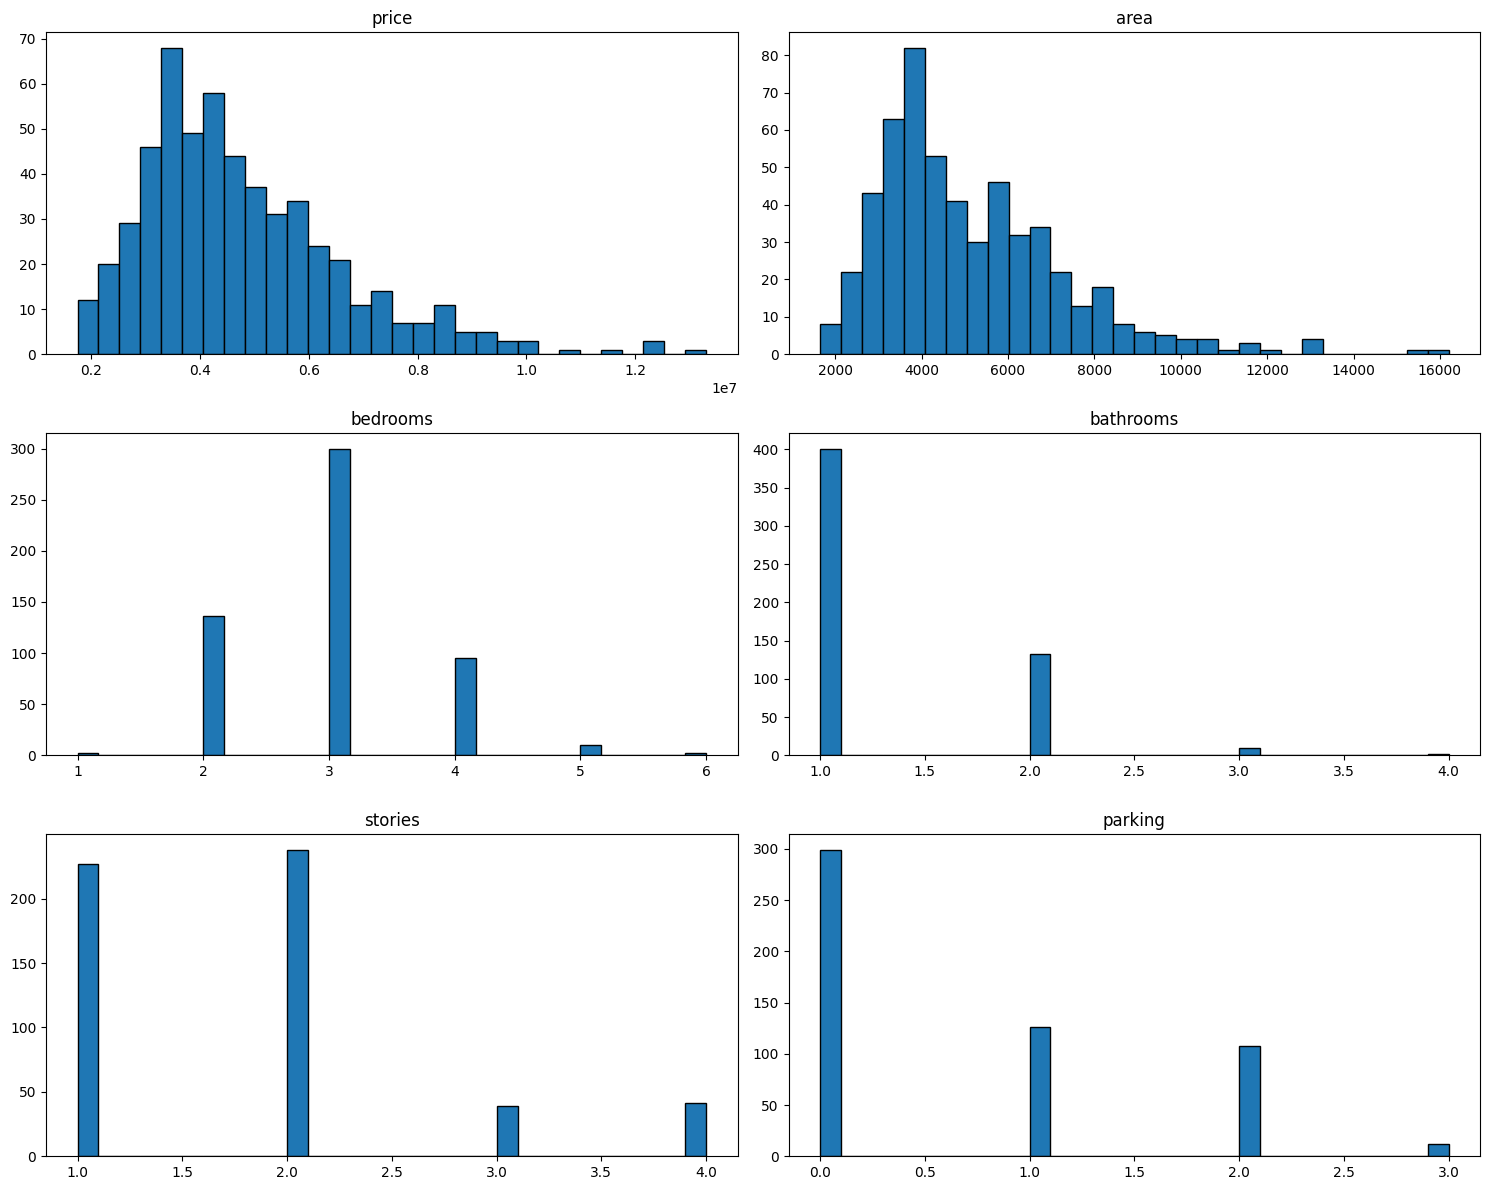

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12)) # Create a grid of 3 rows and 2 columns for histograms
# Plot for 'price'
axes[0,0].hist(data['price'], bins=30, edgecolor='black')
axes[0,0].set_title("price")
axes[0,1].hist(data['area'], bins=30, edgecolor='black')
axes[0,1].set_title("area")
axes[1,0].hist(data['bedrooms'], bins=30, edgecolor='black')
axes[1,0].set_title("bedrooms")
axes[1,1].hist(data['bathrooms'], bins=30, edgecolor='black')
axes[1,1].set_title("bathrooms")
axes[2,0].hist(data['stories'], bins=30, edgecolor='black')
axes[2,0].set_title("stories")
axes[2,1].hist(data['parking'], bins=30, edgecolor='black')
axes[2,1].set_title("parking")

plt.tight_layout()
plt.show()

From the above plot it is clear that the price and area having considerable outliers, so we can drop the outliers as there is sufficient data.

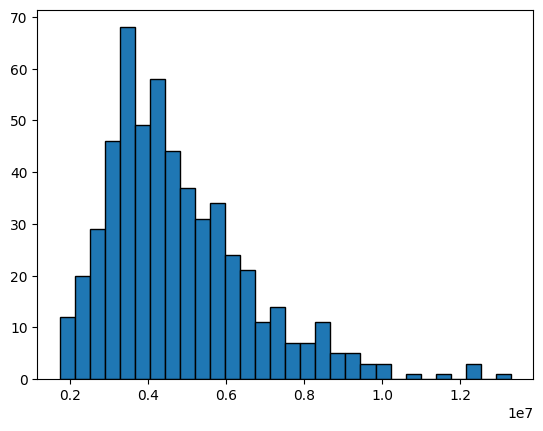

In [10]:
# outlier treatment for price
plt.hist(data.price,bins=30,edgecolor='black')
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

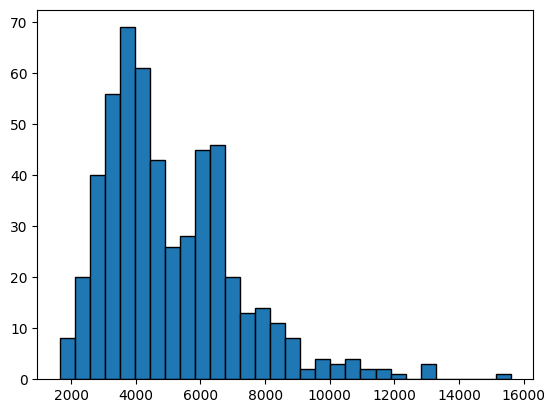

In [11]:
# outlier treatment for area
plt.hist(data.area,bins=30,edgecolor='black')
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]

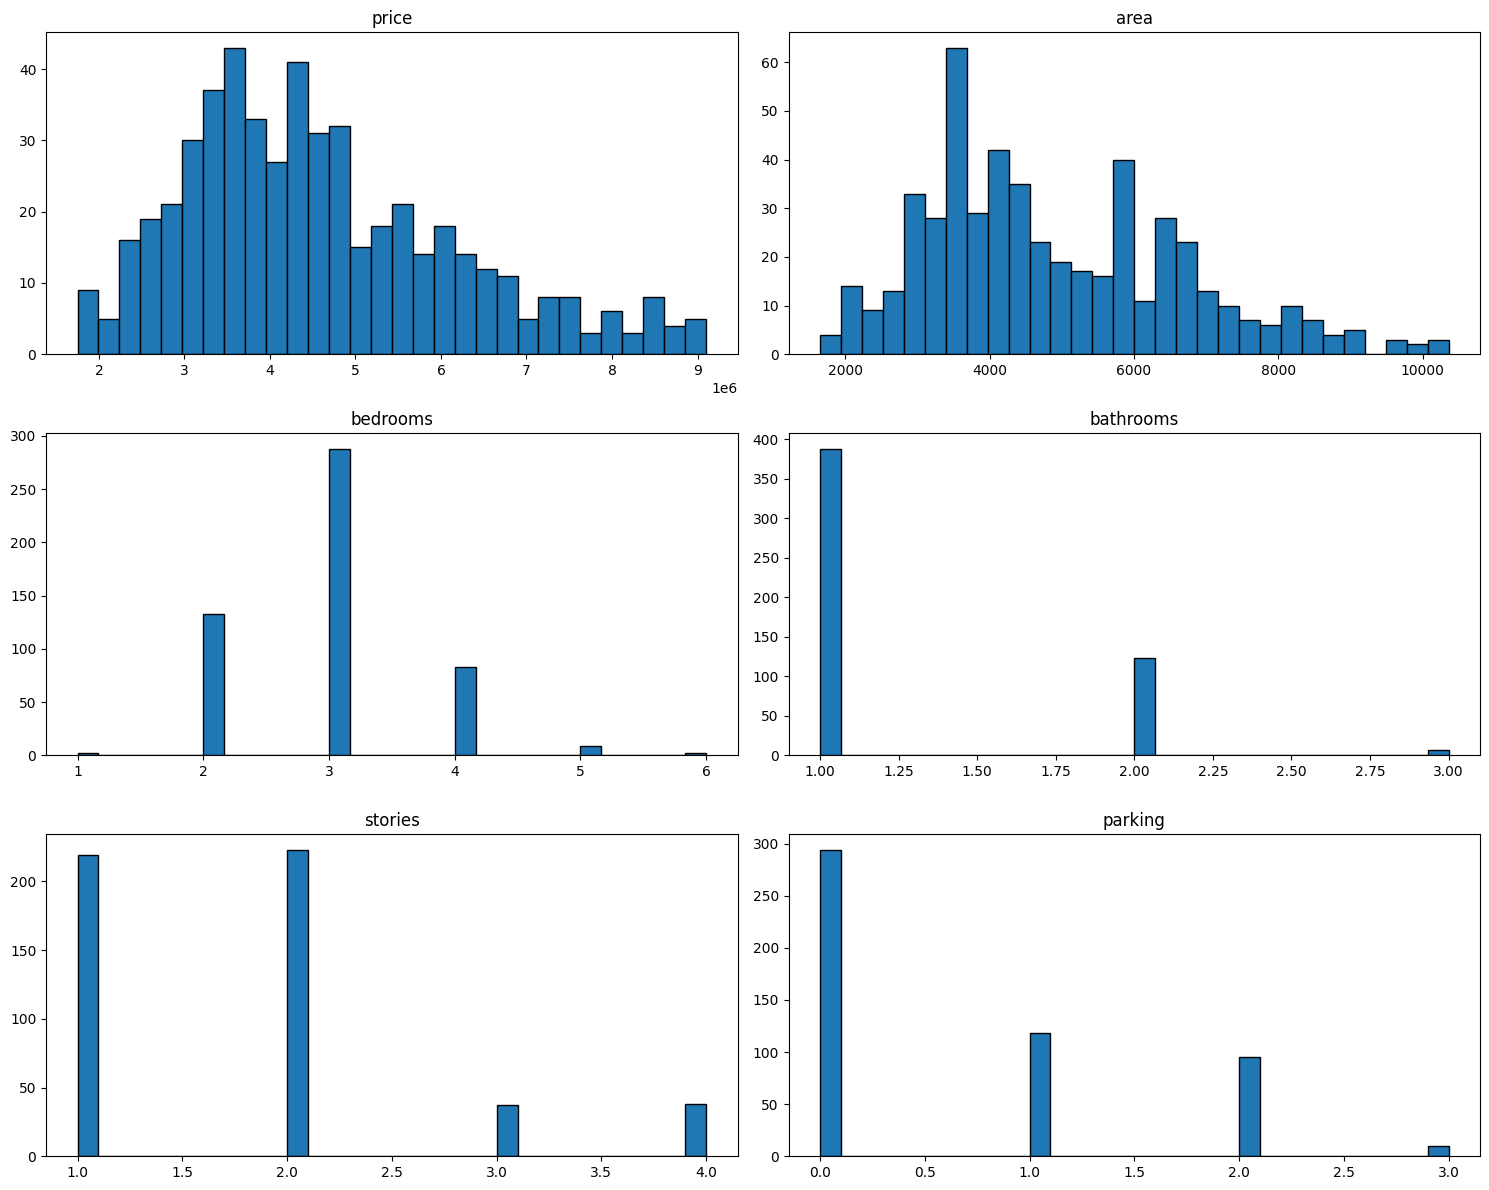

In [12]:
#Outlier Analysis
fig, axes = plt.subplots(3, 2, figsize=(15, 12)) # Create a grid of 3 rows and 2 columns for histograms
# Plot for 'price'
axes[0,0].hist(data['price'], bins=30, edgecolor='black')
axes[0,0].set_title("price")
axes[0,1].hist(data['area'], bins=30, edgecolor='black')
axes[0,1].set_title("area")
axes[1,0].hist(data['bedrooms'], bins=30, edgecolor='black')
axes[1,0].set_title("bedrooms")
axes[1,1].hist(data['bathrooms'], bins=30, edgecolor='black')
axes[1,1].set_title("bathrooms")
axes[2,0].hist(data['stories'], bins=30, edgecolor='black')
axes[2,0].set_title("stories")
axes[2,1].hist(data['parking'], bins=30, edgecolor='black')
axes[2,1].set_title("parking")

plt.tight_layout()
plt.show()

## Exploratory Data Analytics

##### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

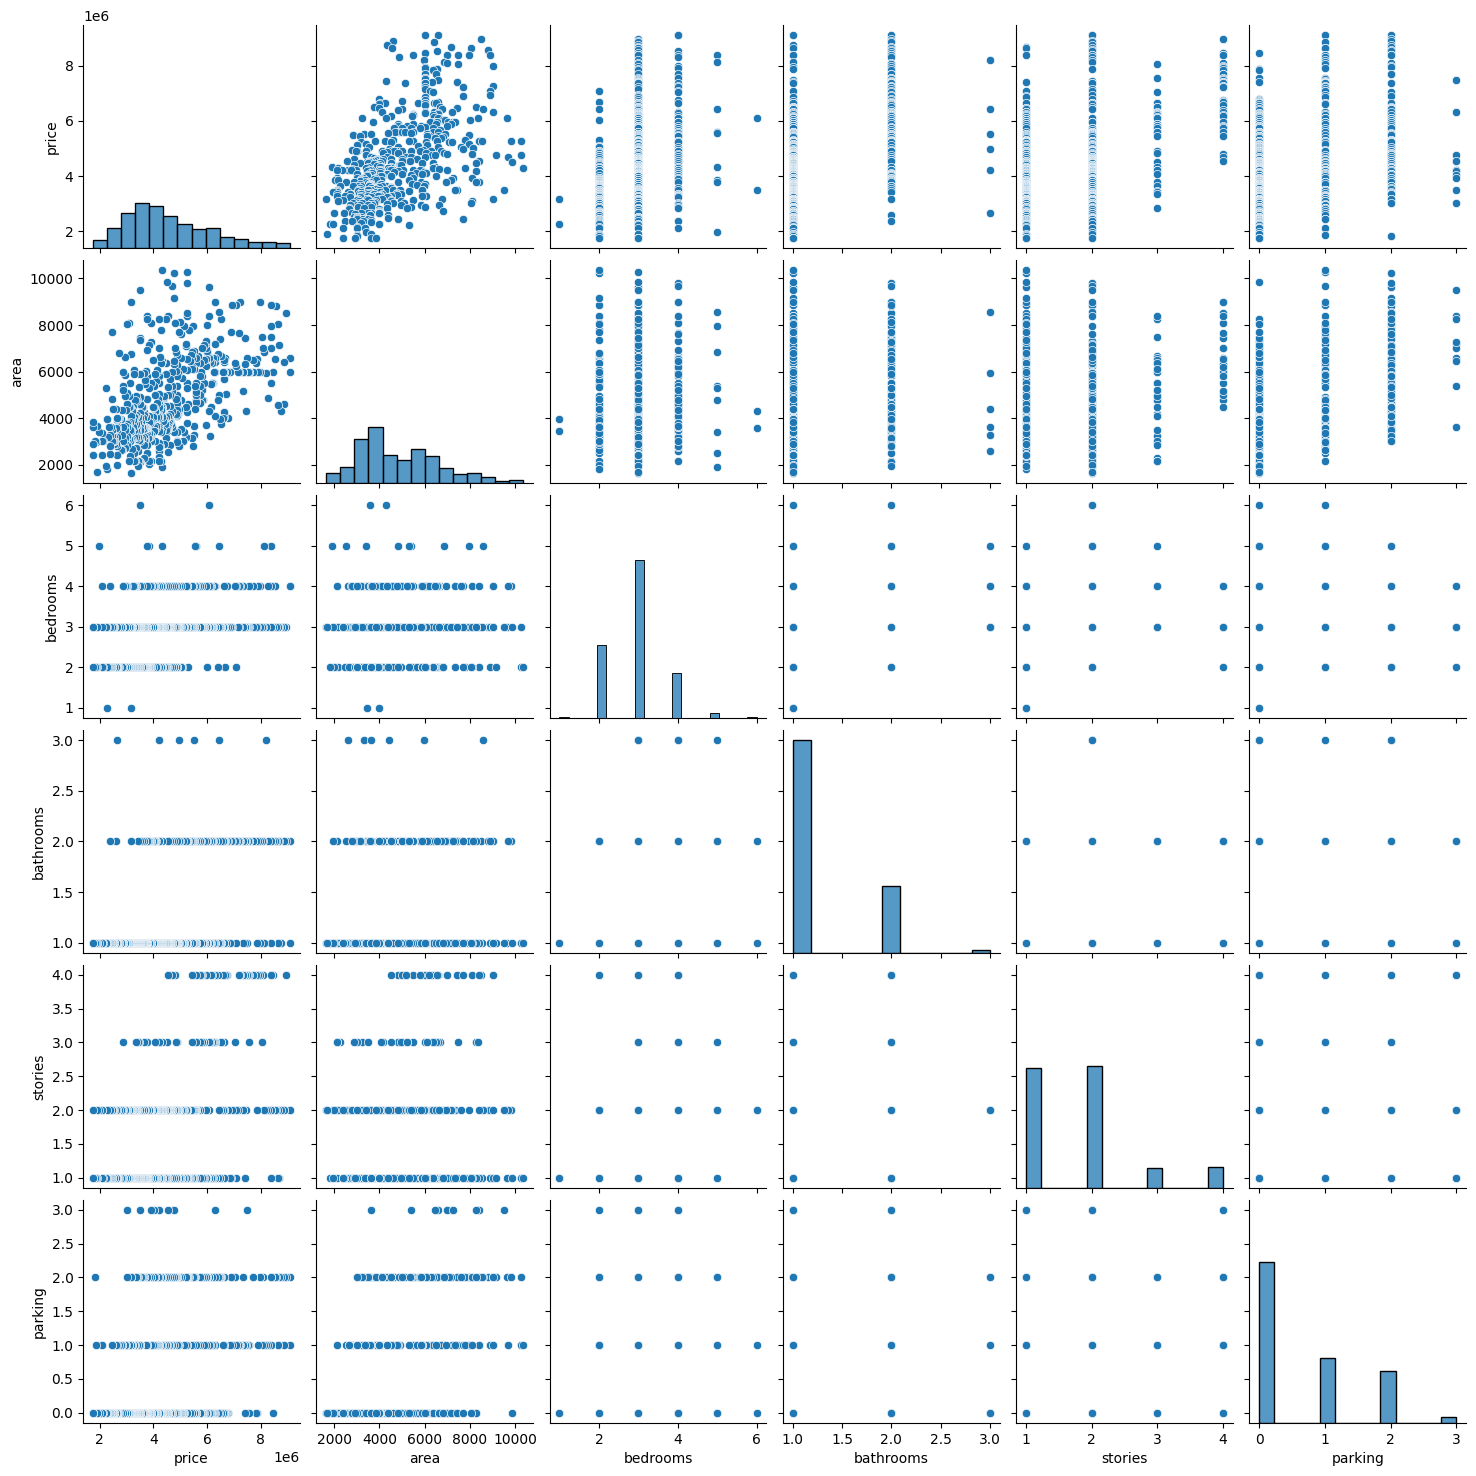

In [13]:
sns.pairplot(data)
plt.show()

##### Visualising categorical variable
As there is few categorical variables such as mainroad, guest, basement etc.Let's make a boxplot for these variables.

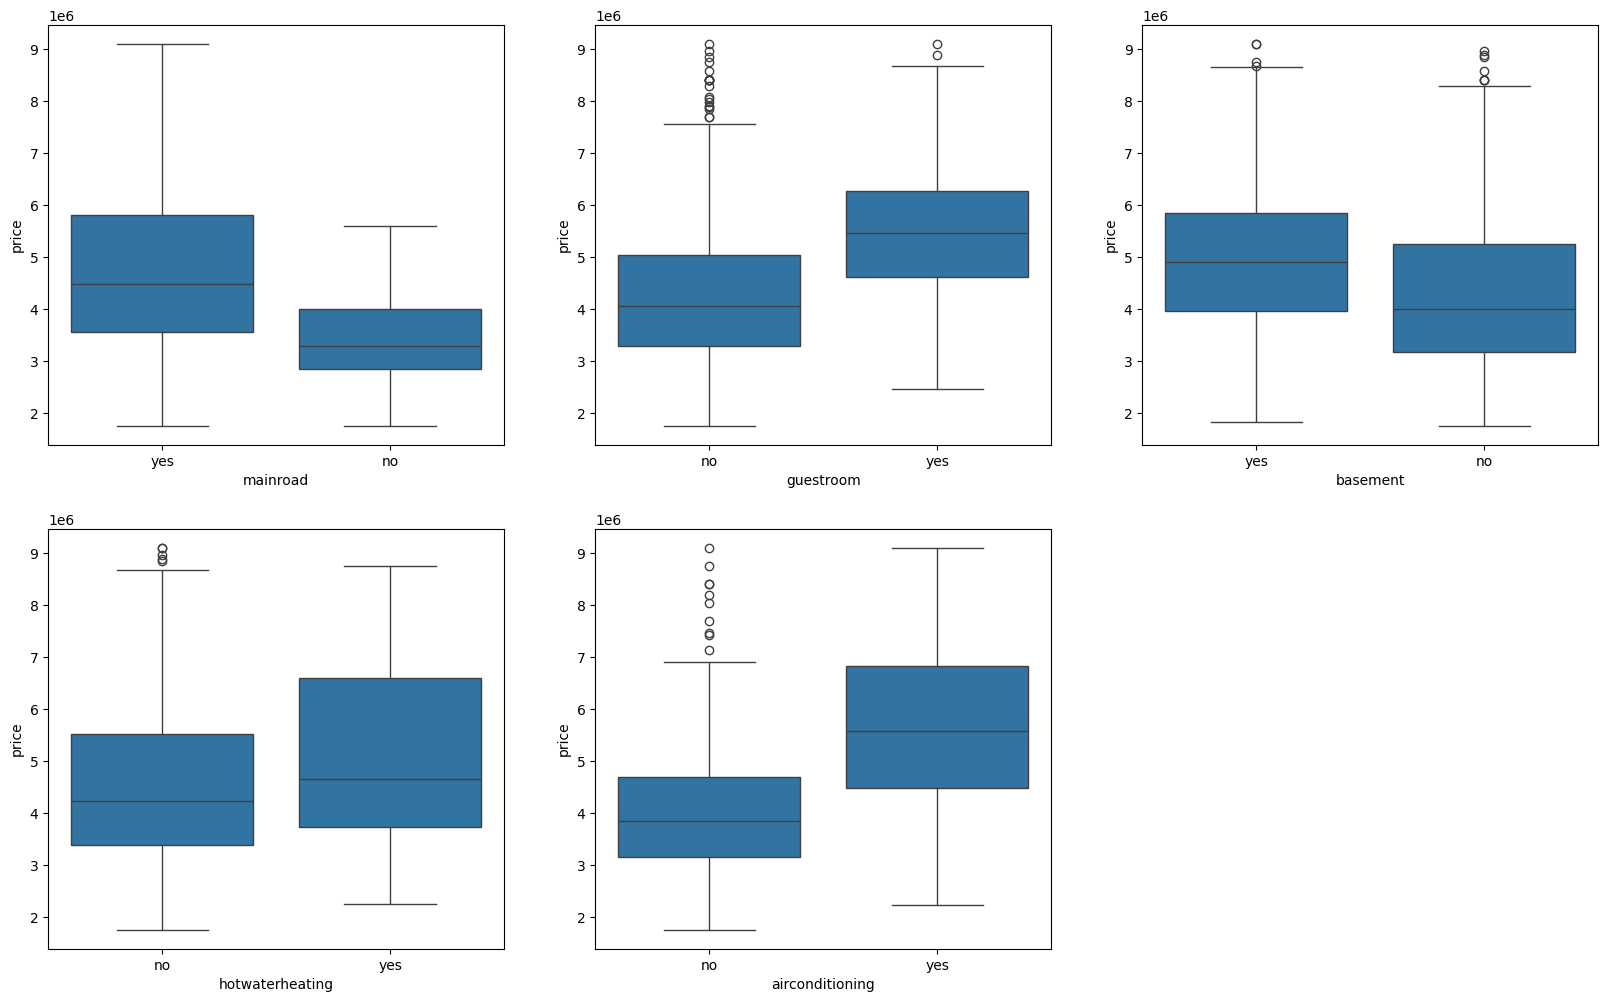

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = data)

plt.show()

There are other categorical variable like 'furnishingstatus',which can be vizualised by using box plt and parallely using 'hue' argument to include 'airconditioning'.This would visually compare how the 'price' distribution varies across different 'furnishingstatus' categories and how the presence of 'air conditioning' might influence the price of the property.

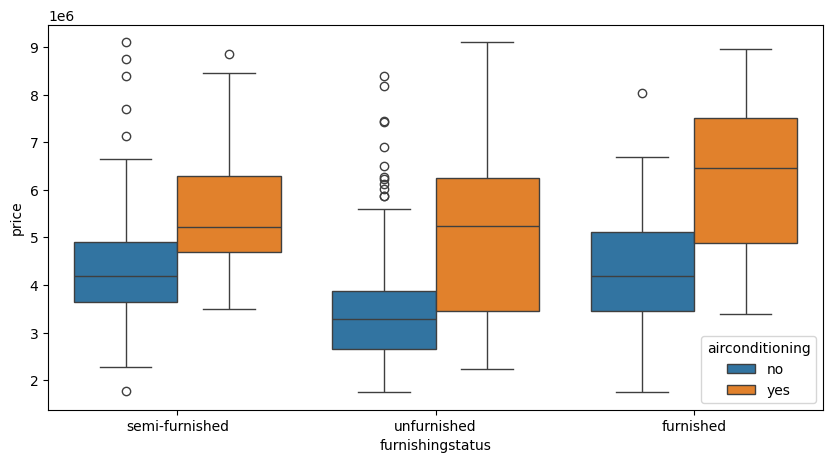

In [15]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = data)
plt.show()

In [16]:
# Assuming the DataFrame is called 'data' and using labelencoder
# List of columns you want to convert from 'Yes'/'No' to 1/0

from sklearn.preprocessing import LabelEncoder
yes_no_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column in 'yes_no_columns'
for col in yes_no_columns:
 data[col] = label_encoder.fit_transform(data[col])

# Check the changes
print(data[yes_no_columns].head())

    mainroad  guestroom  basement  hotwaterheating  airconditioning  prefarea
15         1          0         1                0                0         0
16         1          1         1                0                1         1
17         1          0         0                0                1         0
18         1          1         0                0                1         0
19         1          0         0                0                1         1


In [17]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


#### Dummy Variables
The 'furnishingstatus' variable has three level.By using dummy variables which will convert into integers.


In [18]:
status = pd.get_dummies(data['furnishingstatus'])
status = status.astype(int)


In [19]:
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [20]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [21]:
# Drop 'furnishingstatus' as we have created the dummies for it

data.drop(['furnishingstatus'], axis = 1, inplace = True)

In [22]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
15,9100000,6000,4,1,2,1,0,1,0,0,2,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1


In [23]:
from sklearn.model_selection import train_test_split

np.random.seed(0) #set seed for reproducibility

# Split the data
X_train,y_test = train_test_split(data,train_size=0.7, test_size=0.3, random_state=100)

##### Rescaling the features
In this dataset it is clear that except for 'area' all other column has small integer values.So,it is extremely important to recale the variables so that they have comparable scale.Otherwise, the coefficient obtained by fitting the regression model might be very large or very small as compared to the other coefficients.So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.The two ways of rescaling are Min-Max scaling and standardisation.

In [24]:
#using Min-Max scalar
from sklearn.preprocessing import MinMaxScaler

In [25]:
data_scaler=MinMaxScaler()

In [26]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

X_train[num_vars] = data_scaler.fit_transform(X_train[num_vars])

In [27]:
X_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0


In [28]:
X_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


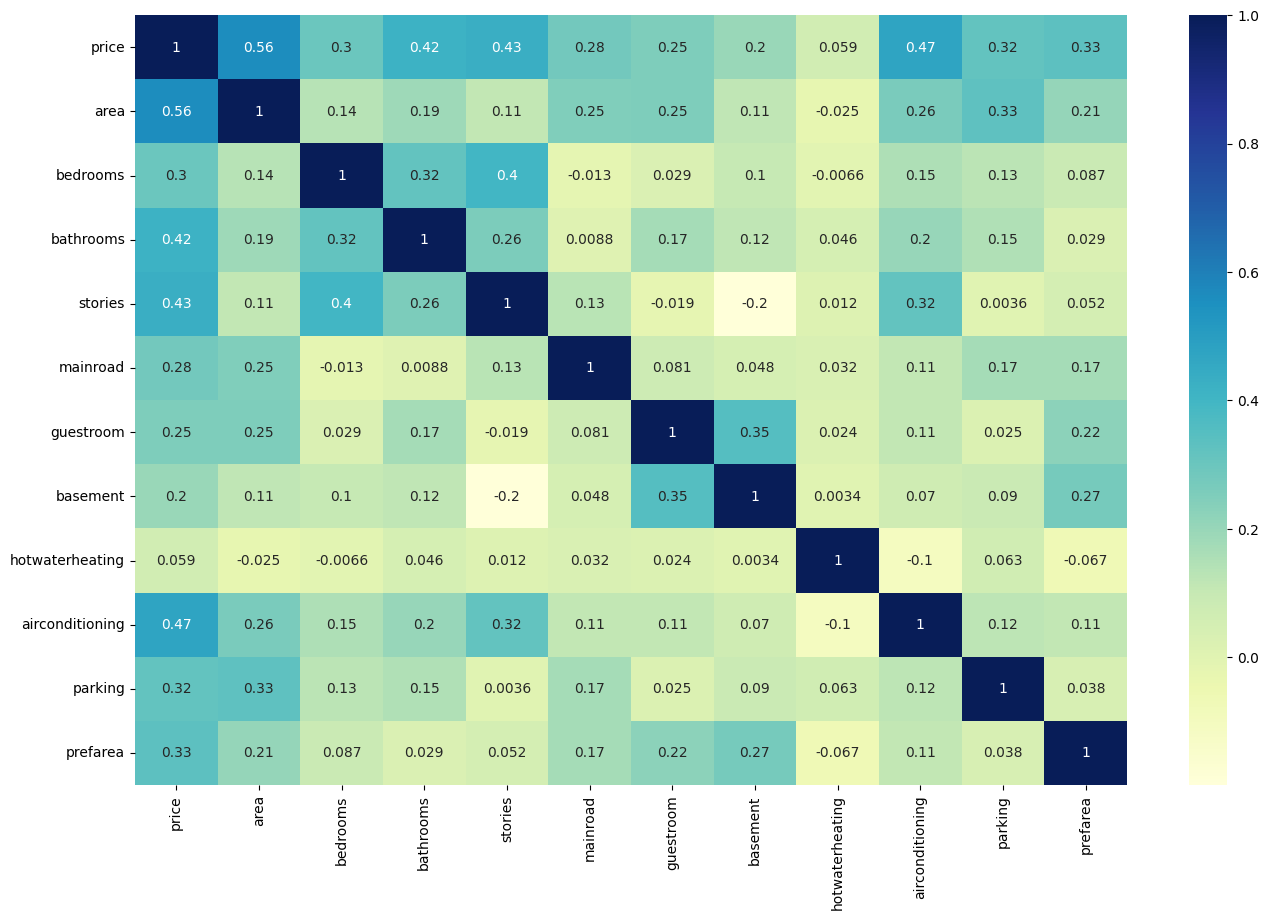

In [29]:
# to check the correlation between the variables which are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Here 'area' seems to be correlated to the 'price' the most.

In [30]:
#Dividing x and Y set
Y_train=X_train.pop('price')
x_train=X_train

### Model Building

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
linear= LinearRegression()
linear.fit(x_train, Y_train)

LinearRegression()

#To remove least significant feature RFE(Recursive Feature Elimination) is used

In [33]:
rfe = RFE(estimator=linear, n_features_to_select=6)           
rfe =rfe.fit(x_train, Y_train)

In [34]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('area', np.True_, np.int64(1)),
 ('bedrooms', np.False_, np.int64(6)),
 ('bathrooms', np.True_, np.int64(1)),
 ('stories', np.True_, np.int64(1)),
 ('mainroad', np.False_, np.int64(3)),
 ('guestroom', np.False_, np.int64(5)),
 ('basement', np.False_, np.int64(4)),
 ('hotwaterheating', np.False_, np.int64(2)),
 ('airconditioning', np.True_, np.int64(1)),
 ('parking', np.True_, np.int64(1)),
 ('prefarea', np.True_, np.int64(1))]

In [35]:
col = x_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [36]:
x_train.columns[~rfe.support_]  #The feature names in x_train that were not selected by the RFE process

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating'], dtype='object')

In [37]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [39]:
 # Running the linear model
lm = sm.OLS(Y_train,x_train_rfe).fit()  

In [40]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.83
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           1.31e-69
Time:                        19:54:37   Log-Likelihood:                 222.77
No. Observations:                 361   AIC:                            -431.5
Df Residuals:                     354   BIC:                            -404.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1097      0.015     

In [41]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.51
1,area,1.24
4,airconditioning,1.20
3,stories,1.17
5,parking,1.14
2,bathrooms,1.12
6,prefarea,1.05


#### Residual Analysis of the train data

In [43]:
Y_train_price = lm.predict(x_train_rfe)

In [44]:
res = (Y_train_price - Y_train)

In [45]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

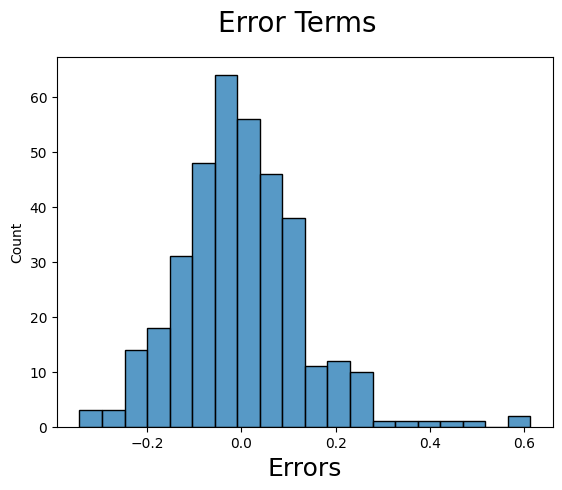

In [46]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((Y_train - Y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

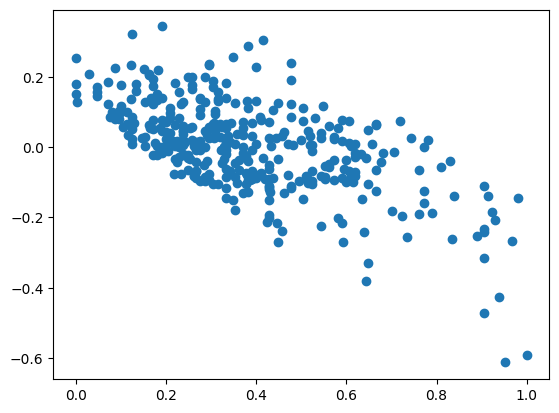

In [47]:
plt.scatter(Y_train,res)
plt.show()

#### Model Evaluation

Applying the scaling on the test sets

In [48]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [49]:
# Initialize the scaler
scaler = MinMaxScaler()

In [50]:
# Apply scaling to the numeric columns
y_test[num_vars] = scaler.fit_transform(y_test[num_vars])

Dividing x-test and y-test

In [51]:
Y_test = y_test.pop('price')
x_test = y_test

In [52]:
# Adding constant variable to test dataframe
x_test = sm.add_constant(x_test)

In [53]:
# Creating X_test_new dataframe by dropping variables from X_test
x_test_rfe = x_test[x_train_rfe.columns]

In [54]:
# Making predictions
y_pred = lm.predict(x_test_rfe)

In [55]:
from sklearn.metrics import r2_score 
r2_score(Y_test, y_pred)

0.5791247774397742

Text(0, 0.5, 'y_pred')

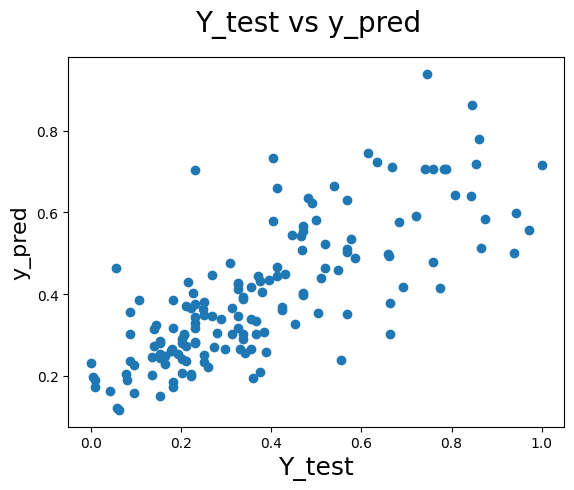

In [56]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test,y_pred)
fig.suptitle('Y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('Y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

We can see that the equation of our best fitted line is:

price=0.35×area+0.20×bathrooms+0.19×stories+0.10×airconditioning+0.10×parking+0.11×prefarea